In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze data

In [20]:
df = pd.read_csv("salaries_cyber_us_cleaned.csv", index_col=0)

In [21]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_size
0,2023,MI,FT,Security Analyst,145000,US,0,M
1,2023,MI,FT,Security Analyst,115000,US,0,M
2,2023,SE,FT,DevSecOps,160000,US,0,M
3,2023,SE,FT,DevSecOps,120000,US,0,M
6,2023,SE,FT,Security Specialist,104000,US,100,M


In [22]:
df = df[df["employment_type"] == "FT"]

In [23]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_size
0,2023,MI,FT,Security Analyst,145000,US,0,M
1,2023,MI,FT,Security Analyst,115000,US,0,M
2,2023,SE,FT,DevSecOps,160000,US,0,M
3,2023,SE,FT,DevSecOps,120000,US,0,M
6,2023,SE,FT,Security Specialist,104000,US,100,M


In [24]:
df.employment_type.unique()

array(['FT'], dtype=object)

In [25]:
df.employee_residence.unique()

array(['US', 'CA', 'ES', 'GB', 'IN', 'CZ', 'JO', 'PT', 'FR', 'PK', 'GH',
       'DE', 'CR', 'JP', 'AE', 'NL', 'BR', 'GR', 'AU'], dtype=object)

## Let's look at the correlation

<AxesSubplot: title={'center': 'U.S. Cyber Salaries'}, xlabel='Company Size', ylabel='Salary'>

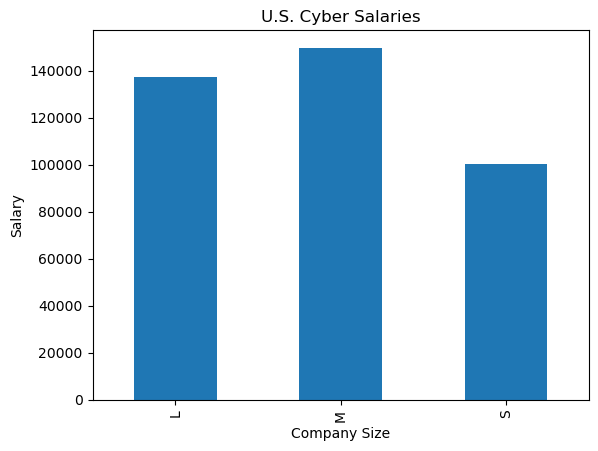

In [26]:
df.groupby("company_size").mean().loc[:, "salary"].plot(kind="bar", xlabel="Company Size", ylabel="Salary", title="U.S. Cyber Salaries")

The mean salary at medium sized companies is the highest, while at small sized companies it is the lowest. 

Let's check which experience levels there are:

[Text(0.5, 0, 'Company Size'),
 Text(0, 0.5, 'Salary'),
 Text(0.5, 1.0, 'U.S. Cyber Salaries')]

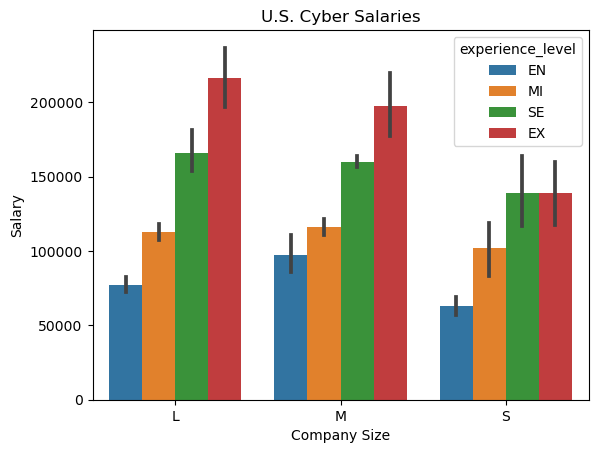

In [27]:
ax = sns.barplot(
    data = df,
    x = "company_size",
    y = "salary",
    hue = "experience_level",
    order = ["L", "M", "S"],
    hue_order= ["EN", "MI", "SE", "EX"],
)

ax.set(xlabel="Company Size", ylabel="Salary", title="U.S. Cyber Salaries")

<AxesSubplot: xlabel='experience_level,company_size'>

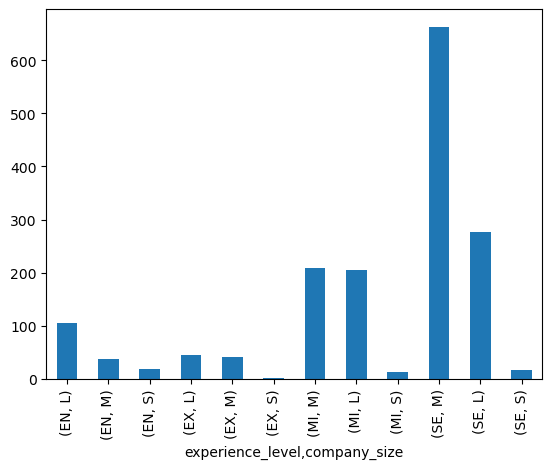

In [28]:
df.loc[:, ["experience_level", "company_size"]].groupby("experience_level").value_counts().plot(kind="bar")

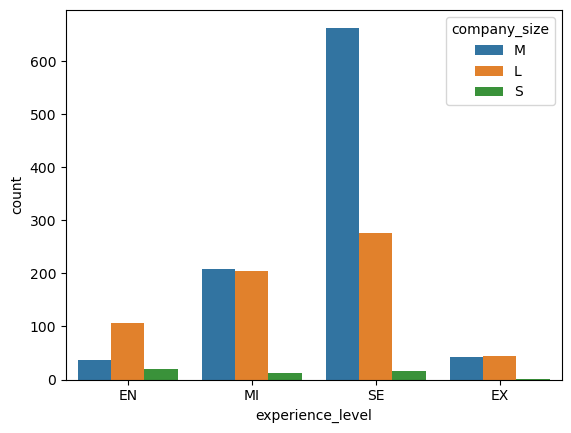

In [29]:
sns.countplot(
    data=df,
    x="experience_level",
    hue="company_size",
    order=["EN", "MI", "SE", "EX"]
);

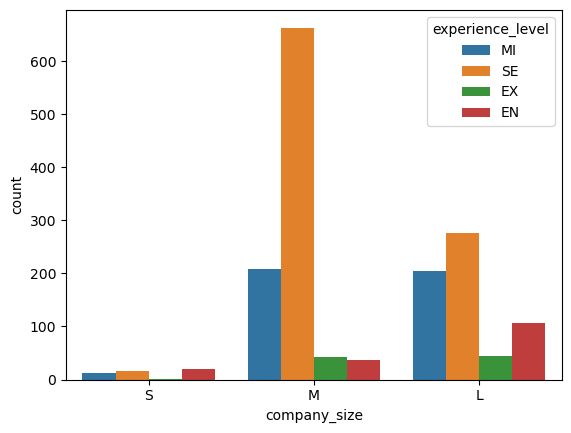

In [30]:
sns.countplot(
    data=df,
    x="company_size",
    hue="experience_level",
    order=["S", "M", "L"]
);

There is less executive-level data available in smaller companies.

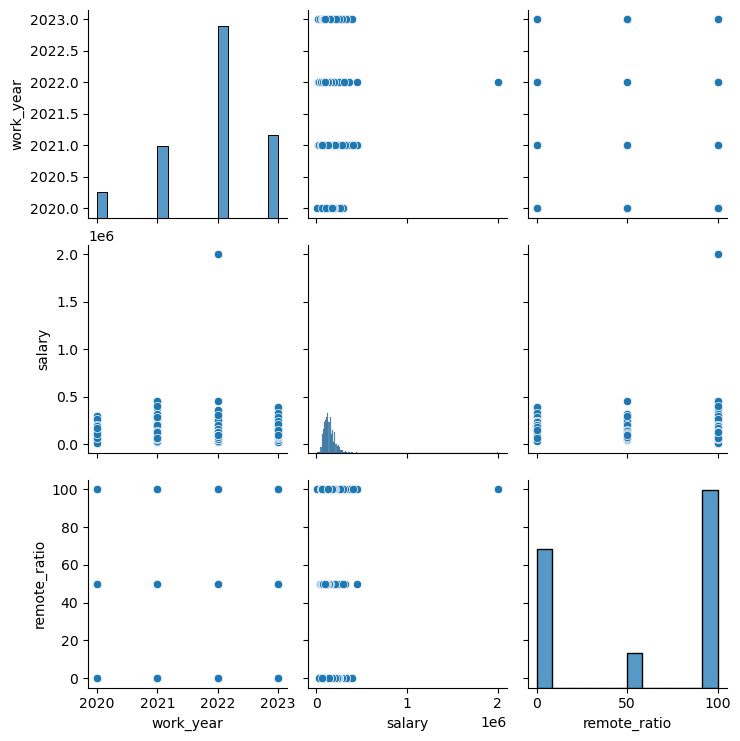

In [31]:
sns.pairplot(df);

## How has the salary change between 2020 and 2022?

In [32]:
mean_salary_per_year = df.loc[:, ["work_year", "salary"]].groupby("work_year").mean()
mean_salary_per_year.head()

,salary
work_year,
2020,128650.814159
2021,121887.888535
2022,146953.067776
2023,158255.890110


Text(0.5, 1.0, 'U.S. Cyber Salaries')

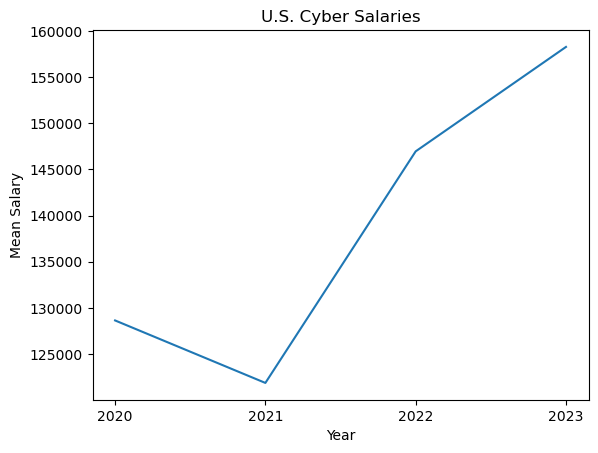

In [33]:
mean_salary_per_year = df.loc[:, ["work_year", "salary"]].groupby("work_year").mean()

x = range(0, len(mean_salary_per_year.index))
y = mean_salary_per_year["salary"]

plt.plot(x, y)
plt.xticks(x, mean_salary_per_year.index)
plt.xlabel("Year")
plt.ylabel("Mean Salary")
plt.title("U.S. Cyber Salaries")

Text(0, 0.5, 'Mean Salary [USD]')

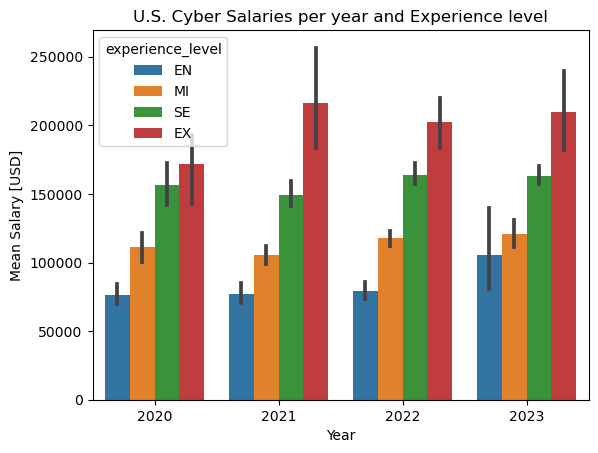

In [34]:
sns.barplot(
    x = df["work_year"],
    y = df["salary"],
    hue = df["experience_level"],
    hue_order = ["EN", "MI", "SE", "EX"],
)

plt.title("U.S. Cyber Salaries per year and Experience level")
plt.xlabel("Year")
plt.ylabel("Mean Salary [USD]")


There are very few data for Contract, part time and freelance positions, so we should get rid of that data

In [35]:
df_ft = df[ df["employment_type"] == "FT" ]
df_ft.drop("employment_type", inplace=True, axis=1)
df_ft.head()

,work_year,experience_level,job_title,salary,employee_residence,remote_ratio,company_size
0,2023,MI,Security Analyst,145000,US,0,M
1,2023,MI,Security Analyst,115000,US,0,M
2,2023,SE,DevSecOps,160000,US,0,M
3,2023,SE,DevSecOps,120000,US,0,M
6,2023,SE,Security Specialist,104000,US,100,M


## Salaries by job title

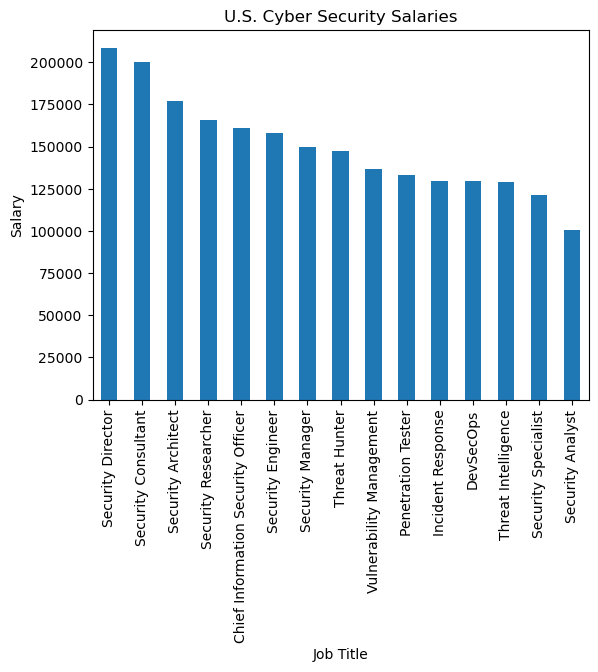

In [36]:
df.loc[:, ["job_title", "salary"]].groupby("job_title").mean().sort_values("salary", ascending=False).plot(kind="bar", xlabel="Job Title", ylabel="Salary", legend=False, title="U.S. Cyber Security Salaries");

## Remote work analysis

In [37]:
df_ft.head()

,work_year,experience_level,job_title,salary,employee_residence,remote_ratio,company_size
0,2023,MI,Security Analyst,145000,US,0,M
1,2023,MI,Security Analyst,115000,US,0,M
2,2023,SE,DevSecOps,160000,US,0,M
3,2023,SE,DevSecOps,120000,US,0,M
6,2023,SE,Security Specialist,104000,US,100,M


<AxesSubplot: title={'center': 'U.S. Cyber Security Salary'}, xlabel='Remote Ratio', ylabel='Salary in USD'>

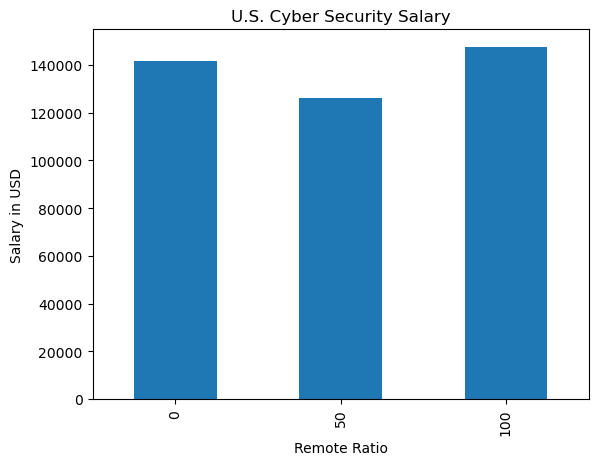

In [38]:
df.loc[:, ["salary", "remote_ratio"]].groupby("remote_ratio").mean().plot(kind="bar", xlabel="Remote Ratio", ylabel="Salary in USD", title="U.S. Cyber Security Salary", legend=False)

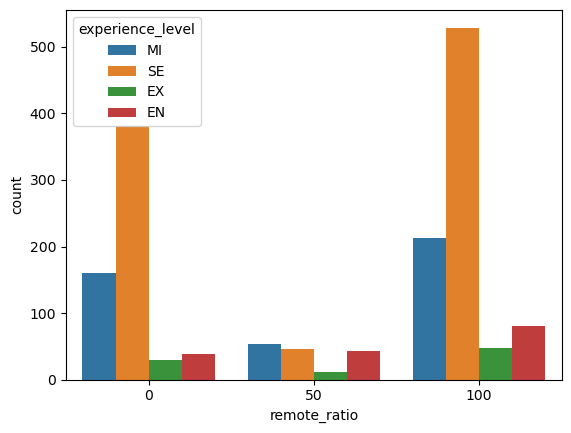

In [42]:
sns.countplot(
    data=df_ft,
    x="remote_ratio",
    hue="experience_level",
);

The first plot shows that a higher remote ratio will result in a higher salary. But this is only because more senior positions, tend to work remote while junior positions have less remote options. 

[Text(0.5, 0, 'Remote Ratio'),
 Text(0, 0.5, 'Salary'),
 Text(0.5, 1.0, 'U.S. Cyber Salaries')]

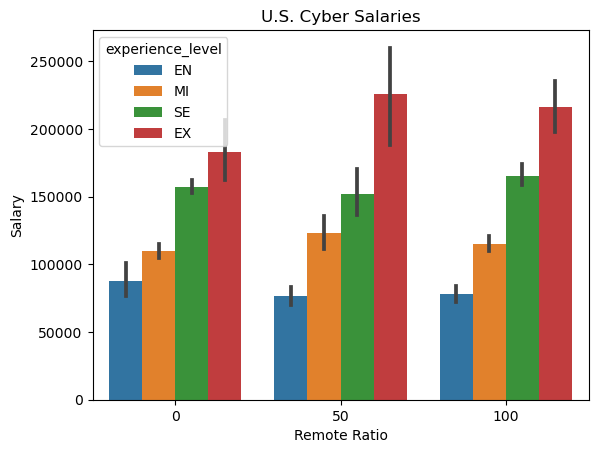

In [43]:
ax = sns.barplot(
    data = df,
    x = "remote_ratio",
    y = "salary",
    hue = "experience_level",
    hue_order = ["EN", "MI", "SE", "EX"]
)
ax.set(xlabel="Remote Ratio", ylabel="Salary", title="U.S. Cyber Salaries")

# Experience level

[Text(0.5, 1.0, 'U.S. Cyber Salaries'),
 Text(0.5, 0, 'Experience Level'),
 Text(0, 0.5, 'Salary')]

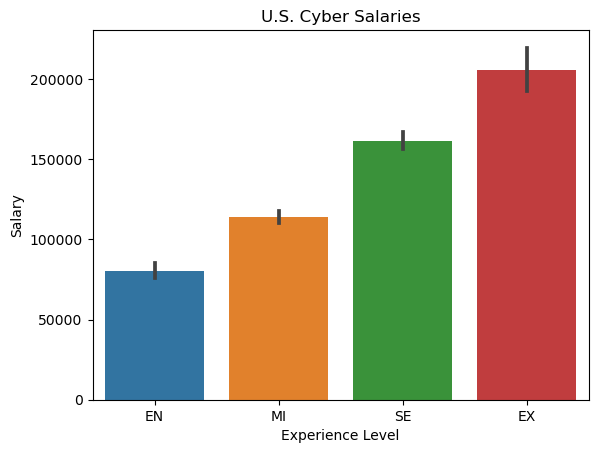

In [44]:
ax = sns.barplot(
    data = df,
    x = "experience_level",
    y = "salary",
    order = ["EN", "MI", "SE", "EX"]
)

ax.set(title = "U.S. Cyber Salaries", xlabel="Experience Level", ylabel="Salary")

# Preparing data for model training

In [45]:
df["experience_level"].value_counts()

SE    956
MI    426
EN    162
EX     88
Name: experience_level, dtype: int64

In [46]:
df["employment_type"].value_counts()

FT    1632
Name: employment_type, dtype: int64

In [47]:
df["company_size"].value_counts()

M    950
L    632
S     50
Name: company_size, dtype: int64

In [48]:
df_model = df[ (df["employment_type"] == "FT") ]
df_model.drop("employment_type", axis=1, inplace=True)
df_model.head()

,work_year,experience_level,job_title,salary,employee_residence,remote_ratio,company_size
0,2023,MI,Security Analyst,145000,US,0,M
1,2023,MI,Security Analyst,115000,US,0,M
2,2023,SE,DevSecOps,160000,US,0,M
3,2023,SE,DevSecOps,120000,US,0,M
6,2023,SE,Security Specialist,104000,US,100,M


In [49]:
df_model.drop("employee_residence", axis=1, inplace=True)
df_model.head()

,work_year,experience_level,job_title,salary,remote_ratio,company_size
0,2023,MI,Security Analyst,145000,0,M
1,2023,MI,Security Analyst,115000,0,M
2,2023,SE,DevSecOps,160000,0,M
3,2023,SE,DevSecOps,120000,0,M
6,2023,SE,Security Specialist,104000,100,M


In [50]:
df_model.drop("work_year", axis=1, inplace=True)
df_model.drop("job_title", axis=1, inplace=True)

In [51]:
df_model.head()

,experience_level,salary,remote_ratio,company_size
0,MI,145000,0,M
1,MI,115000,0,M
2,SE,160000,0,M
3,SE,120000,0,M
6,SE,104000,100,M


In [52]:
df_model.loc[:, "experience_level"].value_counts()

SE    956
MI    426
EN    162
EX     88
Name: experience_level, dtype: int64

In [53]:
df_model.loc[:, "remote_ratio"].value_counts()

100    870
0      609
50     153
Name: remote_ratio, dtype: int64

In [54]:
df_model.loc[:, "company_size"].value_counts()

M    950
L    632
S     50
Name: company_size, dtype: int64

In [55]:
df_model.head()

,experience_level,salary,remote_ratio,company_size
0,MI,145000,0,M
1,MI,115000,0,M
2,SE,160000,0,M
3,SE,120000,0,M
6,SE,104000,100,M


In [56]:
df_model.to_csv("salaries_cyber_model.csv", index=False)